In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io as sio
import os
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import svm
from sklearn.externals import joblib

In [15]:
path_dict=ief.get_path_dict()
print(path_dict.keys())
print(path_dict['szr_ant_root'])
model_name='var_sbox_srch3'
in_file=os.path.join(path_dict['szr_ant_root'],'MODELS',model_name,'classify_metrics_srch.npz')
# Load results
#perf=np.load('classification_metrics_grid.npz')
#perf=np.load('classification_metrics_pwr_vltg.npz')
#perf=np.load('class_metrics_marr_srch.npz')
perf=np.load(in_file)

dict_keys(['ftrs_root', 'szr_ant_root', 'pics', 'onset_csv', 'ieeg_root'])
/Users/davidgroppe/PycharmProjects/SZR_ANT/


In [16]:
# Get xtick labels
str(perf['try_C'])
xlabs=list()
for c in perf['try_C']:
    xlabs.append(str(c))
print(xlabs)

['0.1', '0.4', '0.7', '1.0']


In [7]:
perf.keys()

['valid_sens',
 'valid_spec',
 'train_spec',
 'train_sens',
 'train_subs_list',
 'try_C',
 'C_ct',
 'pptn_preonset_stim',
 'mn_stim_latency',
 'left_out_id',
 'valid_bal_acc',
 'pptn_missed_szrs',
 'ftr_types',
 'train_bal_acc']

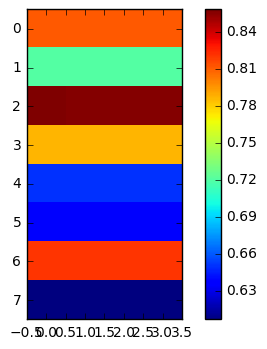

In [17]:
dat=perf['valid_bal_acc']
# dat=perf['pcnt_missed_szrs']
_=plt.imshow(dat,interpolation='nearest')
_=plt.colorbar()

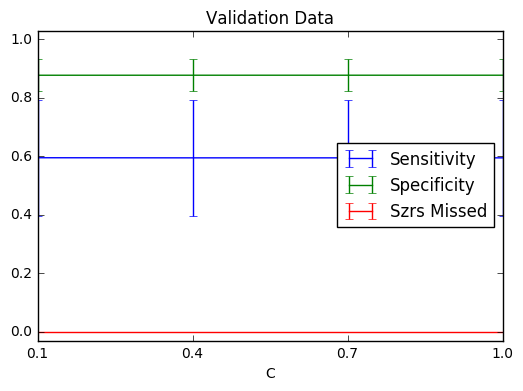

In [18]:
# Valid Sensitivity and Specificity
dat=perf['valid_sens']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Sensitivity')
dat=perf['valid_spec']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Specificity')
dat=perf['pptn_missed_szrs']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Szrs Missed')
# _=plt.plot(np.arange(dat.shape[1]),np.mean(dat,axis=0),'r-o') #makes line visible is no
plt.xlabel('C')
plt.ylim([-.03, 1.03])
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
plt.title('Validation Data')
plt.legend(loc='best')

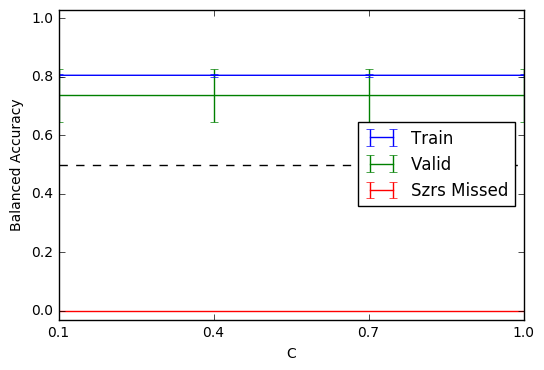

In [19]:
# Balanced Accuracy
dat=perf['train_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
dat=perf['pptn_missed_szrs']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Szrs Missed')
_=plt.plot([0, dat.shape[1]-1],[0.5, 0.5],'k--')
plt.ylabel('Balanced Accuracy')
plt.ylim([-.03, 1.03])
plt.xlabel('C')
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
plt.legend(loc='best')

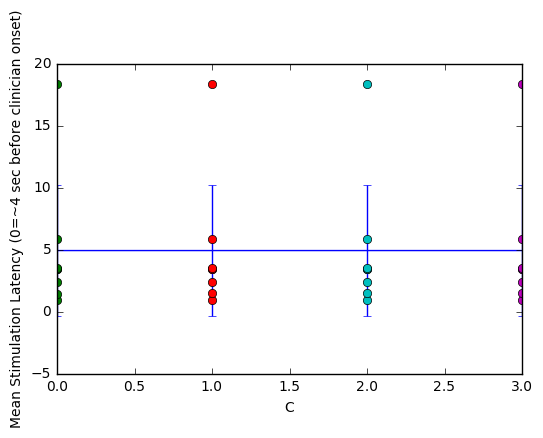

In [21]:
dat=perf['mn_stim_latency']
_=plt.errorbar(np.arange(dat.shape[1]),np.nanmean(dat,axis=0),np.std(dat,axis=0))
n_subs=dat.shape[0]
for a in range(dat.shape[1]):
    _=plt.plot(np.ones(n_subs)*a,dat[:,a],'o')
plt.ylabel('Mean Stimulation Latency (0=~4 sec before clinician onset)')
plt.xlabel('C')
# plt.yscale('log')
# plt.xlim([-.5, 1.5])
# plt.ylim([-.5, 1.5])